In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from scipy import stats

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('/Users/ashutoshanand/Downloads/Price_dataset.csv', index_col='Date', parse_dates=True)

df.index.freq= 'MS'

In [3]:
df.head()

,Gram,Moong,Arhar
Date,,,
2014-01-01,101.8,113.6,106.7
2014-02-01,101.1,116.9,106.5
2014-03-01,100.5,120.0,106.0
2014-04-01,100.6,124.1,106.6
2014-05-01,100.4,126.6,106.8


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 129 entries, 2014-01-01 to 2024-09-01
Freq: MS
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Gram    129 non-null    float64
 1   Moong   129 non-null    float64
 2   Arhar   129 non-null    float64
dtypes: float64(3)
memory usage: 4.0 KB


# Descriptive statistics

<Axes: xlabel='Date'>

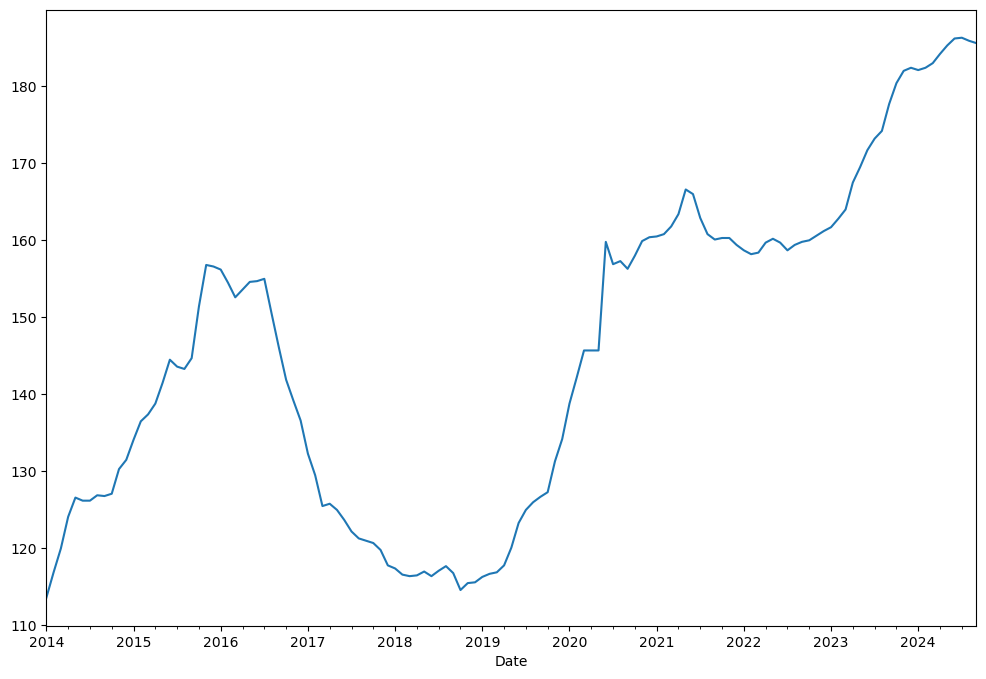

In [5]:
df['Moong'].plot(figsize=(12,8))

In [6]:
df['Moong'].describe()

count    129.000000
mean     145.713178
std       21.457128
min      113.600000
25%      125.800000
50%      145.700000
75%      160.300000
max      186.300000
Name: Moong, dtype: float64

In [7]:
df['Moong'].skew()

0.14074567169619714

In [8]:
df['Moong'].kurtosis()

-1.1231018154212025

## Decompose the series

In [9]:
from statsmodels.tsa.seasonal import seasonal_decompose

In [10]:
decompose = seasonal_decompose(df['Moong'], model='add')

In [11]:
decompose.seasonal

Date
2014-01-01   -0.392627
2014-02-01   -0.678877
2014-03-01   -1.019711
2014-04-01   -0.436748
2014-05-01    0.343808
                ...   
2024-05-01    0.343808
2024-06-01    2.046586
2024-07-01    0.974039
2024-08-01    0.075706
2024-09-01   -0.599711
Freq: MS, Name: seasonal, Length: 129, dtype: float64

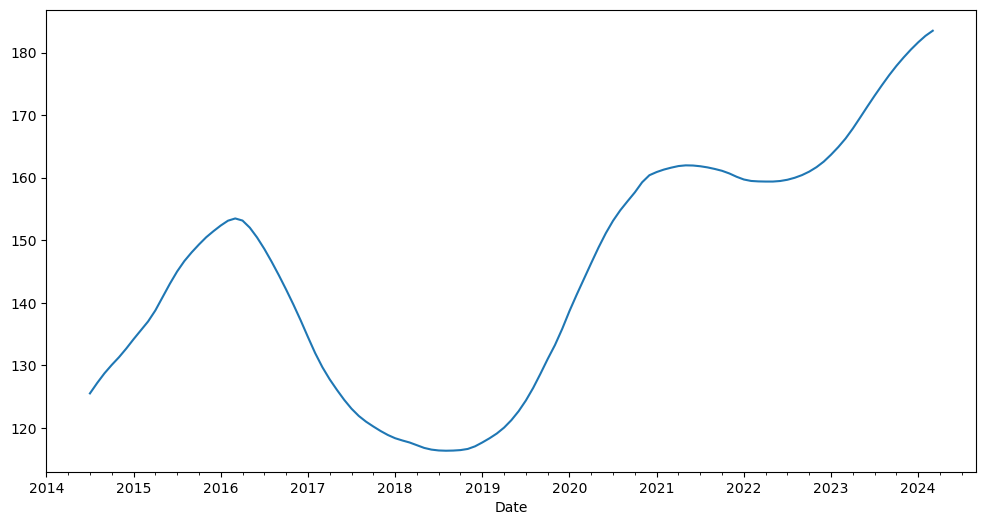

In [12]:
decompose.trend.plot(figsize=(12,6));

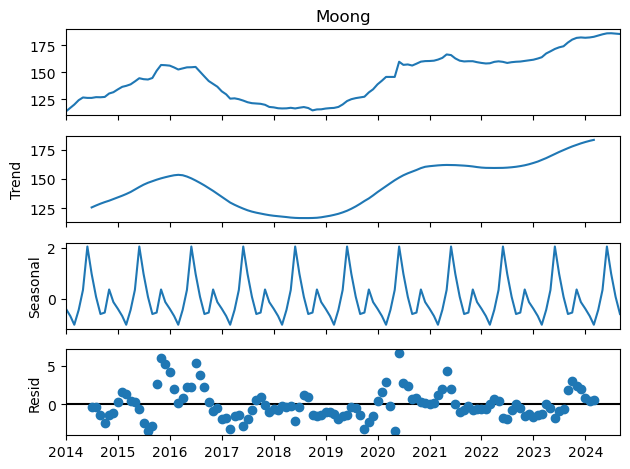

In [13]:
# Plot the decomposition
decompose.plot()
plt.show()

<Axes: >

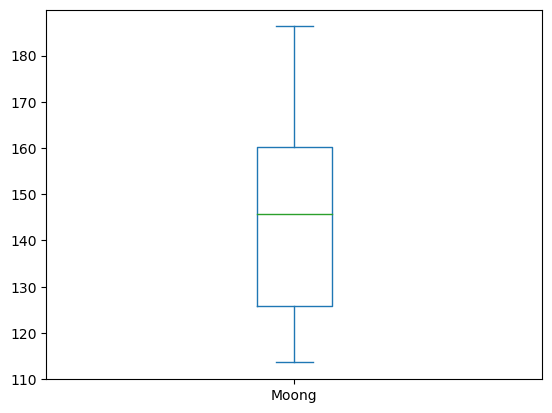

In [14]:
df['Moong'].plot.box()

# Time series modeling

# Stationarity test

A stationary process has the property that the mean, variance and autocorrelation structure do not change over time.

> $H_0$ : Series is unitroot or non stationary,
>> $H_1$ : Series is stationary

<Axes: xlabel='Date'>

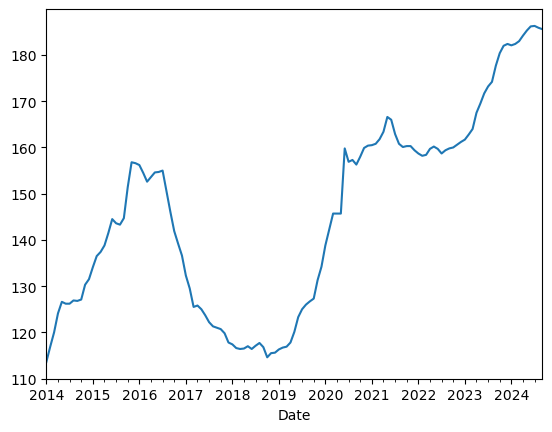

In [15]:
df['Moong'].plot()

In [16]:
from arch.unitroot import ADF, KPSS, PhillipsPerron

In [17]:
PhillipsPerron(df['Moong'])

Test Statistic,-0.997
P-value,0.754
Lags,13


In [18]:
ADF(df['Moong'])

Test Statistic,-1.224
P-value,0.663
Lags,5


#### 1st diff

In [19]:
df_diff = df['Moong'].diff(periods=1).iloc[1:]

In [20]:
df_diff.head()

Date
2014-02-01    3.3
2014-03-01    3.1
2014-04-01    4.1
2014-05-01    2.5
2014-06-01   -0.4
Freq: MS, Name: Moong, dtype: float64

In [21]:
PhillipsPerron(df_diff)

Test Statistic,-8.776
P-value,0.000
Lags,13


In [22]:
df_diff.head()

Date
2014-02-01    3.3
2014-03-01    3.1
2014-04-01    4.1
2014-05-01    2.5
2014-06-01   -0.4
Freq: MS, Name: Moong, dtype: float64

In [23]:
ADF(df_diff)

Test Statistic,-2.687
P-value,0.076
Lags,4


##### In diff. 1, the data series are in stationary.

<Axes: xlabel='Date'>

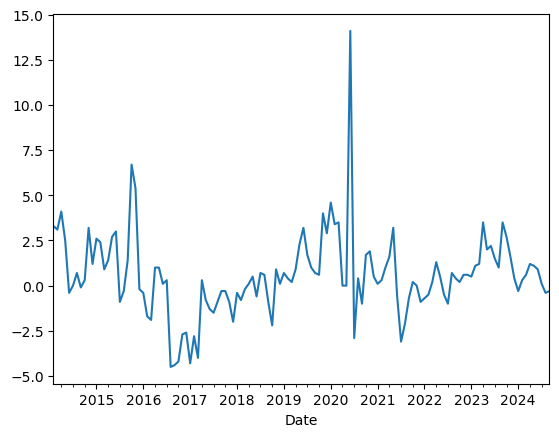

In [24]:
df_diff.plot()

## ACF and PACF plot

>**Autocorrelation** represents the degree of similarity between a given time series and a lagged version of itself over successive time intervals.

> **Partial Autocorrelation** is a conditional correlation.

In [25]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

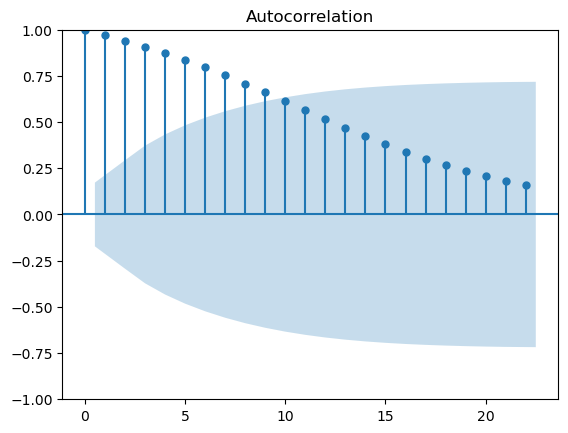

In [26]:
plot_acf(df['Moong']); # q order

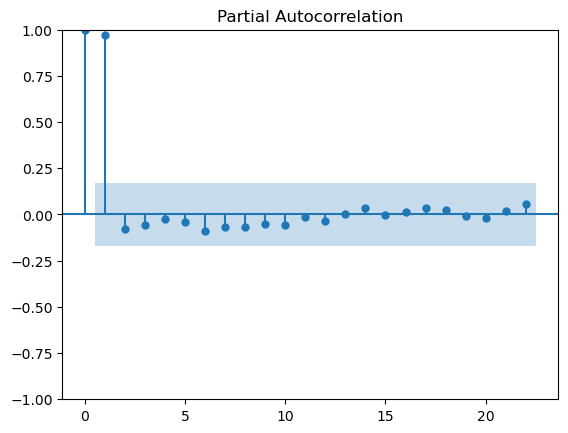

In [27]:
plot_pacf(df['Moong']); # p order

# AUTO ARIMA

In [28]:
from pmdarima import auto_arima

In [29]:
stepwise_fit = auto_arima(df['Moong'], start_p=0,start_q=0, max_p=6,max_q=3, m=12, seasonal=True, trace=True)

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(1,0,1)[12] intercept   : AIC=578.660, Time=0.37 sec
 ARIMA(0,1,0)(0,0,0)[12] intercept   : AIC=577.331, Time=0.01 sec
 ARIMA(1,1,0)(1,0,0)[12] intercept   : AIC=559.260, Time=0.06 sec
 ARIMA(0,1,1)(0,0,1)[12] intercept   : AIC=564.904, Time=0.06 sec
 ARIMA(0,1,0)(0,0,0)[12]             : AIC=582.946, Time=0.01 sec
 ARIMA(1,1,0)(0,0,0)[12] intercept   : AIC=558.246, Time=0.02 sec
 ARIMA(1,1,0)(0,0,1)[12] intercept   : AIC=559.100, Time=0.04 sec
 ARIMA(1,1,0)(1,0,1)[12] intercept   : AIC=560.895, Time=0.14 sec
 ARIMA(2,1,0)(0,0,0)[12] intercept   : AIC=557.264, Time=0.03 sec
 ARIMA(2,1,0)(1,0,0)[12] intercept   : AIC=557.934, Time=0.06 sec
 ARIMA(2,1,0)(0,0,1)[12] intercept   : AIC=557.761, Time=0.06 sec
 ARIMA(2,1,0)(1,0,1)[12] intercept   : AIC=559.647, Time=0.15 sec
 ARIMA(3,1,0)(0,0,0)[12] intercept   : AIC=558.720, Time=0.03 sec
 ARIMA(2,1,1)(0,0,0)[12] intercept   : AIC=553.942, Time=0.04 sec
 ARIMA(2,1,1)(1,0,0)[12] intercep

In [30]:
stepwise_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  129
Model:               SARIMAX(1, 1, 1)   Log Likelihood                -272.926
Date:                Mon, 11 Nov 2024   AIC                            551.852
Time:                        01:58:55   BIC                            560.408
Sample:                    01-01-2014   HQIC                           555.328
                         - 09-01-2024                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9169      0.066     13.830      0.000       0.787       1.047
ma.L1         -0.6868      0.115     -5.954      0.000      -0.913      -0.461
sigma2         4.1486      0.329     12.603      0.000       3.503       4.794
===================================================================================
Ljung-Box (L1) (Q):                   0.28   Jarque-Bera (JB):               844.50
Prob(Q):                              0.59   Prob(JB):                         0.00
Heteroskedasticity (H):               0.32   Skew:                             1.62
Prob(H) (two-sided):                  0.00   Kurtosis:                        15.16
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [31]:
from statsmodels.tsa.arima_model import ARIMA, ARIMAResults

In [32]:
from statsmodels.tsa.arima.model import ARIMA

In [33]:
from statsmodels.tsa.statespace.sarimax import SARIMAX, SARIMAXResults

In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 129 entries, 2014-01-01 to 2024-09-01
Freq: MS
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Gram    129 non-null    float64
 1   Moong   129 non-null    float64
 2   Arhar   129 non-null    float64
dtypes: float64(3)
memory usage: 4.0 KB


In [35]:
train = df.iloc[:115]
test = df.iloc[115:]

In [36]:
len(test)

14

In [37]:
train.tail()

,Gram,Moong,Arhar
Date,,,
2023-03-01,153.7,164.0,175.0
2023-04-01,154.4,167.5,179.8
2023-05-01,155.1,169.5,184.4
2023-06-01,156.1,171.7,200.3
2023-07-01,157.1,173.2,211.4


In [38]:
test.head()

,Gram,Moong,Arhar
Date,,,
2023-08-01,159.9,174.2,217.2
2023-09-01,168.0,177.7,231.6
2023-10-01,173.3,180.4,240.3
2023-11-01,176.1,182.0,245.6
2023-12-01,177.6,182.4,246.4


## ARIMA Model for Gram


ARIMA(p,d,q)

In [39]:
model_gram = ARIMA(train['Moong'], order=(1,1,1))

result_gram = model_gram.fit()
result_gram.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  Moong   No. Observations:                  115
Model:                 ARIMA(1, 1, 1)   Log Likelihood                -248.320
Date:                Mon, 11 Nov 2024   AIC                            502.639
Time:                        01:59:21   BIC                            510.848
Sample:                    01-01-2014   HQIC                           505.970
                         - 07-01-2023                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9194      0.072     12.728      0.000       0.778       1.061
ma.L1         -0.6935      0.126     -5.503      0.000      -0.941      -0.447
sigma2         4.5462      0.397     11.445      0.000       3.768       5.325
===================================================================================
Ljung-Box (L1) (Q):                   0.19   Jarque-Bera (JB):               624.13
Prob(Q):                              0.66   Prob(JB):                         0.00
Heteroskedasticity (H):               1.55   Skew:                             1.55
Prob(H) (two-sided):                  0.18   Kurtosis:                        14.03
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [40]:
prediction_gram = result_gram.predict(start=len(train),end=len(train)+len(test)-1, typ='levels').rename('ARIMA(1,1,1)-predictions')

In [41]:
prediction_gram

2023-08-01    174.501546
2023-09-01    175.698192
2023-10-01    176.798393
2023-11-01    177.809923
2023-12-01    178.739928
2024-01-01    179.594978
2024-02-01    180.381114
2024-03-01    181.103891
2024-04-01    181.768416
2024-05-01    182.379382
2024-06-01    182.941107
2024-07-01    183.457559
2024-08-01    183.932387
2024-09-01    184.368946
Freq: MS, Name: ARIMA(1,1,1)-predictions, dtype: float64

In [42]:
test['ARIMA_prediction']= prediction_gram

<Axes: title={'center': 'True prediction_ARIMA'}, xlabel='Date'>

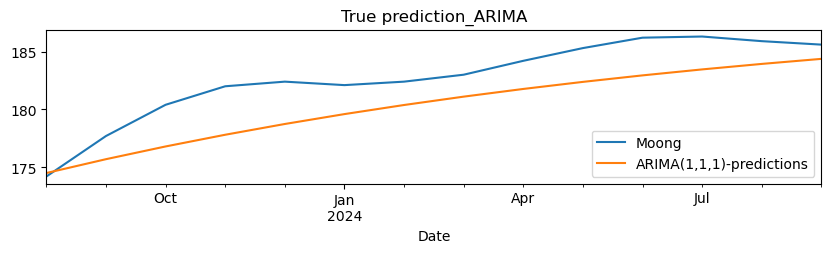

In [43]:
test['Moong'].plot(figsize=(10,2), legend=True, title='True prediction_ARIMA')
prediction_gram.plot(legend=True)

## Error estimation

In [44]:
from statsmodels.tools.eval_measures import rmse, mse

In [45]:
rmse(test['Moong'],prediction_gram)

2.6792634496449907

In [46]:
mse(test['Moong'],prediction_gram)

7.178452632603575

In [47]:
test['Moong'].mean()

182.69285714285712

In [48]:
prediction_gram.mean()

180.24826866068676

# Final Model Forecasting

In [49]:
FinalModel_gram = ARIMA(df['Moong'], order=(1,1,1))

FinalResult_gram = FinalModel_gram.fit()

In [50]:
FinalResult_gram.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  Moong   No. Observations:                  129
Model:                 ARIMA(1, 1, 1)   Log Likelihood                -272.926
Date:                Mon, 11 Nov 2024   AIC                            551.852
Time:                        01:59:39   BIC                            560.408
Sample:                    01-01-2014   HQIC                           555.328
                         - 09-01-2024                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9169      0.066     13.830      0.000       0.787       1.047
ma.L1         -0.6868      0.115     -5.954      0.000      -0.913      -0.461
sigma2         4.1486      0.329     12.603      0.000       3.503       4.794
===================================================================================
Ljung-Box (L1) (Q):                   0.28   Jarque-Bera (JB):               844.50
Prob(Q):                              0.59   Prob(JB):                         0.00
Heteroskedasticity (H):               0.32   Skew:                             1.62
Prob(H) (two-sided):                  0.00   Kurtosis:                        15.16
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [51]:
forecast_gram = FinalResult_gram.predict(start=len(df),end=len(df)+12 , typ='levels').rename('ARIMA(1,1,1)-forecast')

<Axes: xlabel='Date'>

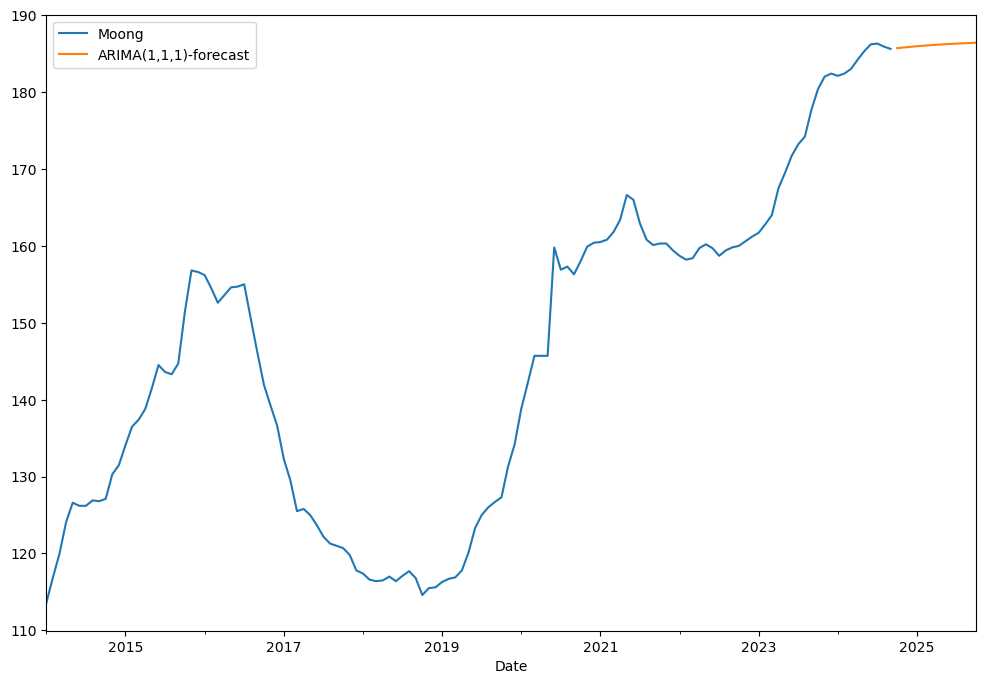

In [53]:
df['Moong'].plot(figsize=(12,8),legend=True)
forecast_gram.plot(legend=True)

In [54]:
print(forecast_gram)

2024-10-01    185.699359
2024-11-01    185.790460
2024-12-01    185.873990
2025-01-01    185.950577
2025-02-01    186.020799
2025-03-01    186.085184
2025-04-01    186.144218
2025-05-01    186.198346
2025-06-01    186.247975
2025-07-01    186.293479
2025-08-01    186.335201
2025-09-01    186.373455
2025-10-01    186.408530
Freq: MS, Name: ARIMA(1,1,1)-forecast, dtype: float64


# Kolmogorov-Smirnov test for goodness of fit. Normality of residuals

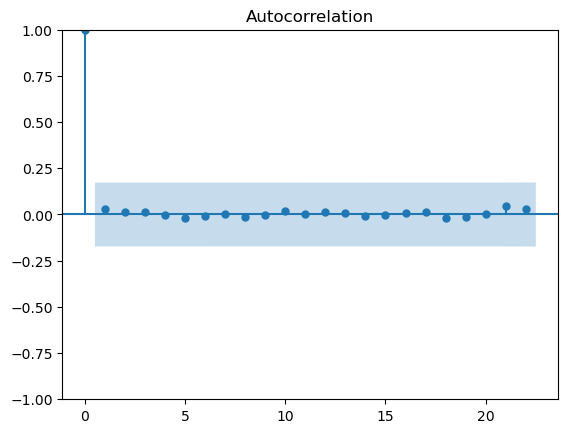

In [55]:
plot_acf(FinalResult_gram.resid);

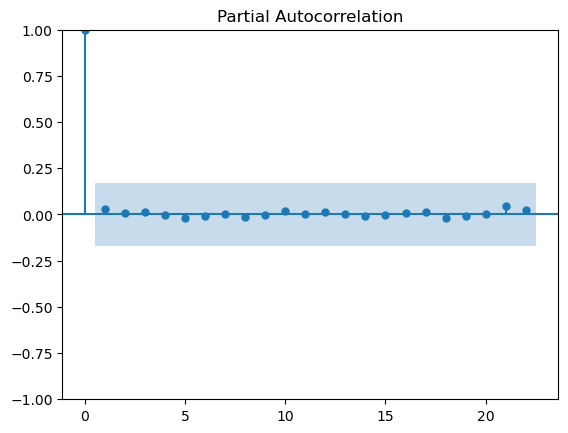

In [56]:
plot_pacf(FinalResult_gram.resid);

<Axes: xlabel='Date'>

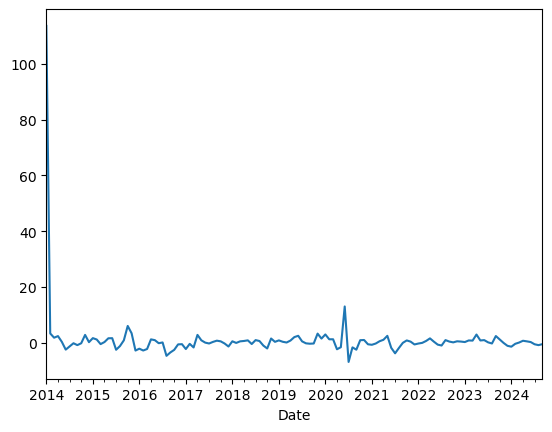

In [57]:
FinalResult_gram.resid.plot()

<Axes: ylabel='Frequency'>

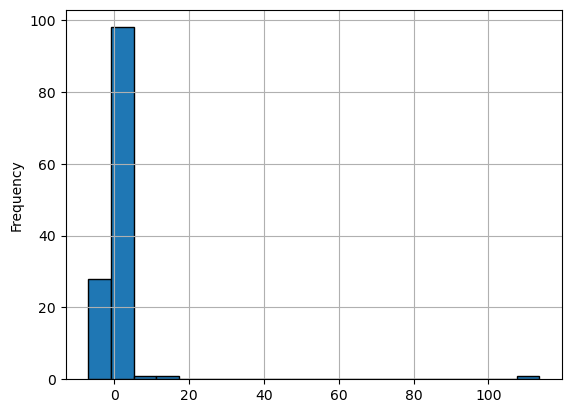

In [58]:
FinalResult_gram.resid.plot.hist(bins=20,grid=True,edgecolor='k')

##### Normality test

In [59]:
stats.kstest(FinalResult_gram.resid.values, 'norm') # Kolmogorov-Smirnov test

KstestResult(statistic=0.10390164168234475, pvalue=0.11490902467923236, statistic_location=-1.6339267315774748, statistic_sign=1)

In [60]:
stats.shapiro(FinalResult_gram.resid)      # Shapiro wilk test

ShapiroResult(statistic=0.17597466707229614, pvalue=9.964264599193076e-24)

In [61]:
from statsmodels.graphics.tsaplots import quarter_plot, month_plot

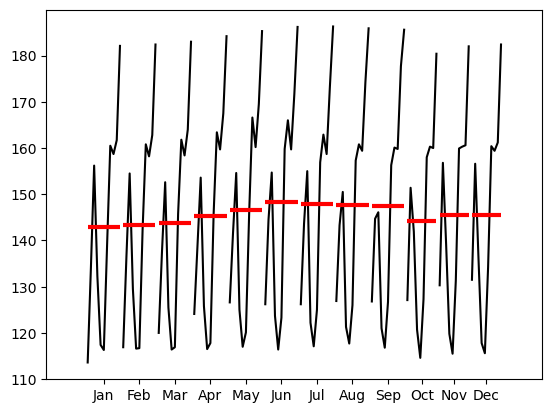

In [62]:
month_plot(df['Moong']);

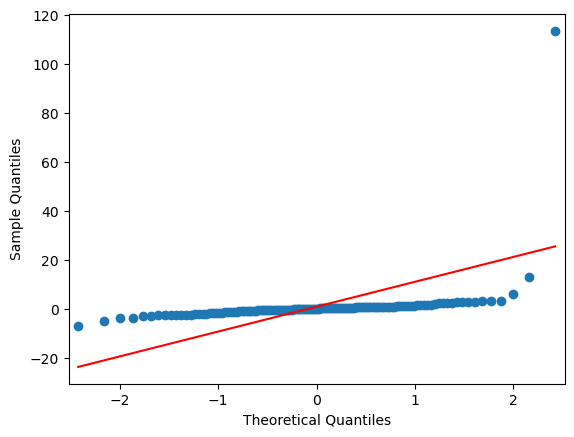

In [63]:
import numpy as np
import statsmodels.api as sm
import pylab


sm.qqplot(FinalResult_gram.resid, line='s');

In [64]:
sm.stats.diagnostic.acorr_ljungbox(FinalResult_gram.resid, lags=[30],return_df=True)

,lb_stat,lb_pvalue
30,1.295528,1.0


# ARIMA-GARCH

In [65]:
sm.stats.diagnostic.het_arch(FinalResult_gram.resid, nlags=20)

(8.729404511988278, 0.9858347155363397, 0.38305726285769, 0.9913414290983629)

In [66]:
resid= FinalResult_gram.resid

In [67]:
resid

Date
2014-01-01    113.600000
2014-02-01      3.299748
2014-03-01      1.775473
2014-04-01      2.348743
2014-05-01      0.277637
                 ...    
2024-05-01      0.463195
2024-06-01      0.209560
2024-07-01     -0.581267
2024-08-01     -0.890919
2024-09-01     -0.545152
Freq: MS, Length: 129, dtype: float64

In [68]:
resid_train = resid.iloc[:115]
resid_test = resid.iloc[115:]

In [69]:
from arch import arch_model

In [70]:
model_garch = arch_model(resid_train , mean='constant', vol='GARCH', p=1, q=1)
results_garch = model_garch.fit(update_freq = 5)
results_garch.summary()

Iteration:      5,   Func. Count:     30,   Neg. LLF: 610.3052474726535
Iteration:     10,   Func. Count:     58,   Neg. LLF: 275.5052759147446
Iteration:     15,   Func. Count:     85,   Neg. LLF: 252.6269366372241
Optimization terminated successfully    (Exit mode 0)
            Current function value: 252.4977227544344
            Iterations: 23
            Function evaluations: 104
            Gradient evaluations: 19


<class 'statsmodels.iolib.summary.Summary'>
"""
                     Constant Mean - GARCH Model Results                      
==============================================================================
Dep. Variable:                   None   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:               -252.498
Distribution:                  Normal   AIC:                           512.995
Method:            Maximum Likelihood   BIC:                           523.975
                                        No. Observations:                  115
Date:                Mon, Nov 11 2024   Df Residuals:                      114
Time:                        02:00:23   Df Model:                            1
                                Mean Model                                
==========================================================================
                 coef    std err          t      P>|t|    95.0% Conf. Int.
--------------------------------------------------------------------------
mu             0.4645      0.237      1.963  4.967e-02 [6.662e-04,  0.928]
                               Volatility Model                              
=============================================================================
                 coef    std err          t      P>|t|       95.0% Conf. Int.
-----------------------------------------------------------------------------
omega          1.9267      0.719      2.679  7.393e-03      [  0.517,  3.336]
alpha[1]       1.0000      0.448      2.234  2.551e-02      [  0.122,  1.878]
beta[1]        0.0000  1.014e-03      0.000      1.000 [-1.988e-03,1.988e-03]
=============================================================================

Covariance estimator: robust
"""

In [71]:
resid_test

Date
2023-08-01   -0.303620
2023-09-01    2.374578
2023-10-01    1.121821
2023-11-01   -0.105098
2023-12-01   -1.139203
2024-01-01   -1.449190
2024-02-01   -0.420277
2024-03-01    0.036276
2024-04-01    0.674784
2024-05-01    0.463195
2024-06-01    0.209560
2024-07-01   -0.581267
2024-08-01   -0.890919
2024-09-01   -0.545152
Freq: MS, dtype: float64

In [72]:
rolling_predictions = []
test_size = 14

for i in range(test_size):
    train = resid[:-(test_size-i)]
    model = arch_model(train, mean='constant', vol='GARCH', p=1, q=1)
    model_fit = model.fit(disp='off')
    pred = model_fit.forecast(horizon=1)
    rolling_predictions.append(np.sqrt(pred.variance.values[-1,:][0]))

In [73]:
rolling_predictions = pd.Series(rolling_predictions, index=resid.index[-14:])

In [74]:
rolling_predictions

Date
2023-08-01    1.433997
2023-09-01    1.573973
2023-10-01    2.351274
2023-11-01    1.520226
2023-12-01    1.492042
2024-01-01    2.114469
2024-02-01    2.349826
2024-03-01    1.621890
2024-04-01    1.420689
2024-05-01    1.372932
2024-06-01    1.341701
2024-07-01    1.350432
2024-08-01    1.666370
2024-09-01    1.860307
Freq: MS, dtype: float64

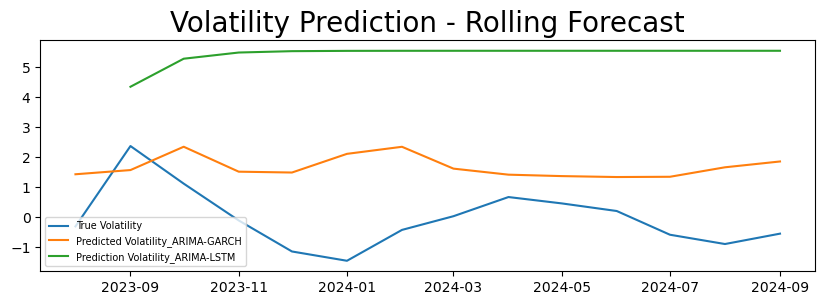

In [152]:
plt.figure(figsize=(10,3))
true, = plt.plot(resid_test)
preds, = plt.plot(rolling_predictions)
pred, = plt.plot(test_resid['prediction Volatility ARIMA-LSTM(Random_Forest)'])
plt.title('Volatility Prediction - Rolling Forecast', fontsize=20)
plt.legend(['True Volatility', 'Predicted Volatility_ARIMA-GARCH','Prediction Volatility_ARIMA-LSTM'], fontsize=7)

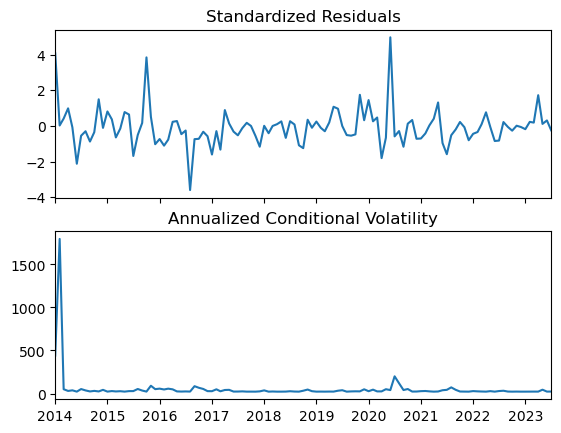

In [76]:
results_garch.plot(annualize='D');

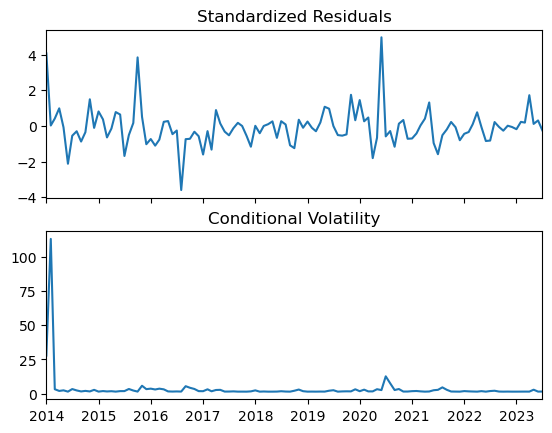

In [77]:
results_garch.plot();

## Normality Check

<Axes: ylabel='Frequency'>

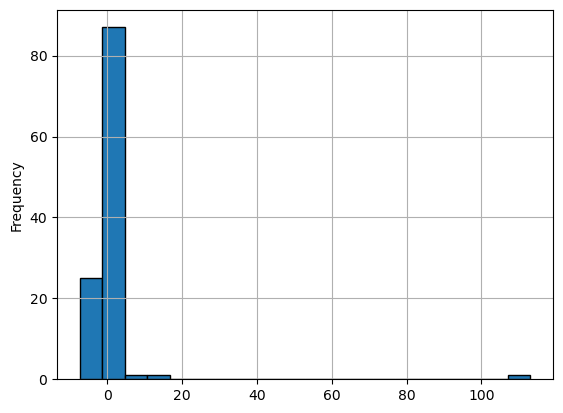

In [78]:
results_garch.resid.plot.hist(bins=20,grid=True,edgecolor='k')

In [79]:
stats.kstest(results_garch.std_resid.values, 'norm') # Kolmogorov-Smirnov test

KstestResult(statistic=0.18283285965072327, pvalue=0.0007760279065599507, statistic_location=0.3671705485735758, statistic_sign=1)

In [80]:
stats.shapiro(results_garch.std_resid)      # Shapiro wilk test

ShapiroResult(statistic=0.8463735580444336, pvalue=1.421499695730688e-09)

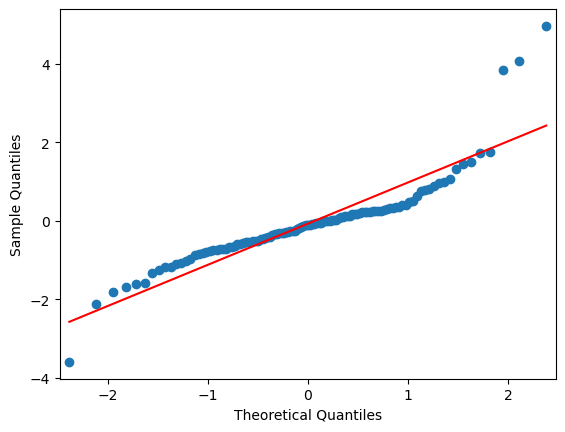

In [81]:
import numpy as np
import statsmodels.api as sm


sm.qqplot(results_garch.std_resid, line='s');

In [82]:
sm.stats.diagnostic.acorr_ljungbox(results_garch.resid, lags=[15], return_df=True)

,lb_stat,lb_pvalue
15,0.310092,1.0


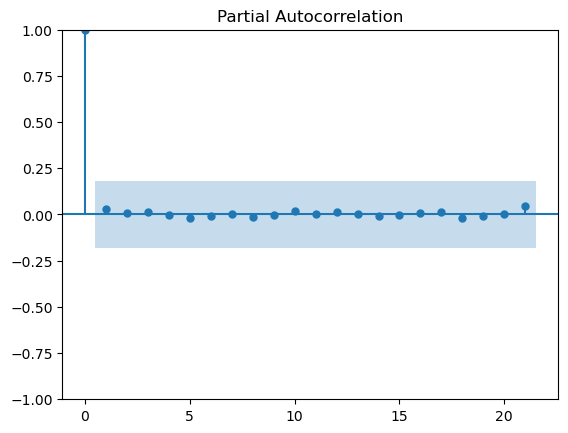

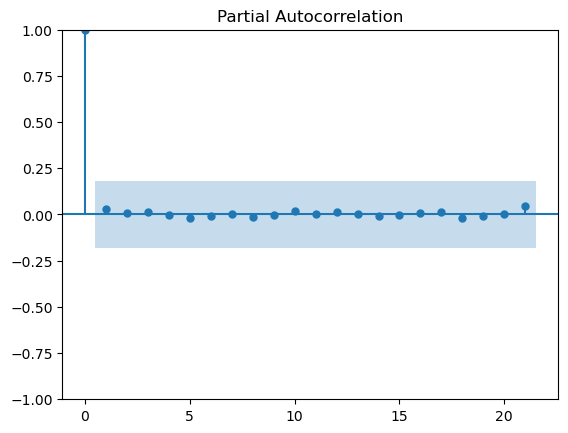

In [83]:
plot_pacf(results_garch.resid)

<Axes: xlabel='Date'>

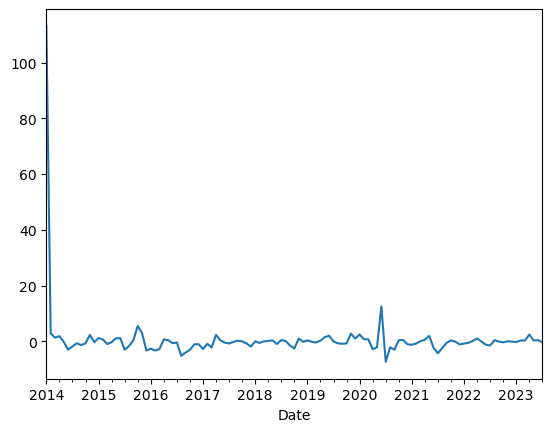

In [84]:
results_garch.resid.plot()

In [85]:
test

,Gram,Moong,Arhar,ARIMA_prediction
Date,,,,
2023-08-01,159.9,174.2,217.2,174.501546
2023-09-01,168.0,177.7,231.6,175.698192
2023-10-01,173.3,180.4,240.3,176.798393
2023-11-01,176.1,182.0,245.6,177.809923
2023-12-01,177.6,182.4,246.4,178.739928
2024-01-01,177.7,182.1,241.2,179.594978
2024-02-01,177.0,182.4,236.7,180.381114
2024-03-01,177.3,183.0,233.8,181.103891
2024-04-01,176.9,184.2,236.2,181.768416


In [86]:
prediction_gram

2023-08-01    174.501546
2023-09-01    175.698192
2023-10-01    176.798393
2023-11-01    177.809923
2023-12-01    178.739928
2024-01-01    179.594978
2024-02-01    180.381114
2024-03-01    181.103891
2024-04-01    181.768416
2024-05-01    182.379382
2024-06-01    182.941107
2024-07-01    183.457559
2024-08-01    183.932387
2024-09-01    184.368946
Freq: MS, Name: ARIMA(1,1,1)-predictions, dtype: float64

In [87]:
predicted_mu = result_gram.forecast()[0]

In [88]:
predicted_mu

174.50154560216976

In [89]:
garch_forecast = results_garch.forecast(horizon=1)

In [90]:
predicted_et = garch_forecast.mean['h.1'].iloc[-1]

In [91]:
predicted_et

0.4645345591875813

In [92]:
prediction = predicted_mu+predicted_et

In [93]:
prediction_GARCH = prediction_gram+rolling_predictions

In [94]:
prediction_GARCH

2023-08-01    175.935542
2023-09-01    177.272165
2023-10-01    179.149668
2023-11-01    179.330150
2023-12-01    180.231970
2024-01-01    181.709447
2024-02-01    182.730940
2024-03-01    182.725781
2024-04-01    183.189105
2024-05-01    183.752314
2024-06-01    184.282807
2024-07-01    184.807991
2024-08-01    185.598757
2024-09-01    186.229253
Freq: MS, dtype: float64

In [95]:
rmse(test['Moong'],prediction_GARCH)

1.3817652252736818

In [96]:
prediction_GARCH.shape

(14,)

In [97]:
test['Moong'].shape

(14,)

In [98]:
prediction_gram.shape

(14,)

In [99]:
mse(test['Moong'],prediction_GARCH)

1.9092751377756287

In [ ]:
!pip install diebold_mariano_test

In [100]:
from diebold_mariano_test import cul_d_t,MAE,MSE,cul_DM,cul_P

In [101]:
dm = cul_d_t(MAE,test['Moong'],prediction_gram,prediction_GARCH)

In [102]:
cul_DM(dm)

5.8246577136033615

In [103]:
cul_P(dm)

5.72297710207576e-09

In [104]:
MAE(3,test['Moong'],prediction_gram)

3.6016065441914407

In [105]:
dm1=cul_d_t(MAE,test['Moong'],prediction_GARCH,prediction_gram)

In [106]:
cul_DM(dm1)

-5.8246577136033615

In [107]:
test['GARCH_prediction']= prediction_GARCH

# ARIMA-LSTM

### Lag estimation

In [108]:
from statsmodels.tsa.stattools import acf
from sklearn.ensemble import RandomForestRegressor
from matplotlib import pyplot
from pandas import DataFrame

In [109]:
acf(FinalResult_gram.resid**2,nlags=12,qstat=True)

(array([ 1.00000000e+00,  5.09177312e-04, -1.96677057e-04, -7.81152666e-05,
        -5.72151921e-04, -1.45184395e-04, -5.64528102e-04, -7.57743382e-04,
        -7.73104840e-04, -8.97772532e-04, -3.59254875e-04, -1.01679380e-03,
        -8.75831190e-04]),
 array([3.42285991e-05, 3.93757238e-05, 4.01941175e-05, 8.44502760e-05,
        8.73229027e-05, 1.31108071e-04, 2.10640726e-04, 2.94114956e-04,
        4.07619275e-04, 4.25947457e-04, 5.74009853e-04, 6.84803781e-04]),
 array([0.99533199, 0.99998031, 0.99999993, 1.        , 1.        ,
        1.        , 1.        , 1.        , 1.        , 1.        ,
        1.        , 1.        ]))

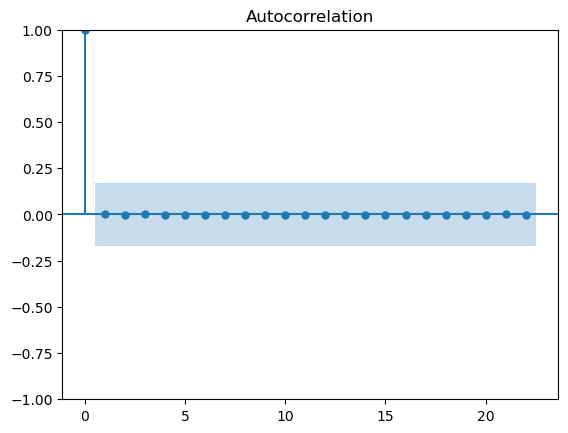

In [110]:
plot_acf(FinalResult_gram.resid**2);

In [111]:
df['resid'] = FinalResult_gram.resid**2

In [112]:
df

,Gram,Moong,Arhar,resid
Date,,,,
2014-01-01,101.8,113.6,106.7,12904.960000
2014-02-01,101.1,116.9,106.5,10.888337
2014-03-01,100.5,120.0,106.0,3.152305
2014-04-01,100.6,124.1,106.6,5.516596
2014-05-01,100.4,126.6,106.8,0.077082
...,...,...,...,...
2024-05-01,178.5,185.3,243.6,0.214550
2024-06-01,183.3,186.2,254.1,0.043915
2024-07-01,186.7,186.3,259.0,0.337871


In [113]:
mylist= ['resid']

df1 = df[mylist][1:]
df1.head()

,resid
Date,
2014-02-01,10.888337
2014-03-01,3.152305
2014-04-01,5.516596
2014-05-01,0.077082
2014-06-01,6.278486


In [114]:
dataframe = DataFrame()
for i in range(9,0,-1):
    dataframe['t-'+str(i)] = df1.shift(i).values[:,0]
dataframe['t'] = df1.values[:,0]
print(dataframe.head(10))
dataframe = dataframe[10:]

         t-9        t-8        t-7        t-6        t-5        t-4  \
0        NaN        NaN        NaN        NaN        NaN        NaN   
1        NaN        NaN        NaN        NaN        NaN        NaN   
2        NaN        NaN        NaN        NaN        NaN        NaN   
3        NaN        NaN        NaN        NaN        NaN        NaN   
4        NaN        NaN        NaN        NaN        NaN  10.888337   
5        NaN        NaN        NaN        NaN  10.888337   3.152305   
6        NaN        NaN        NaN  10.888337   3.152305   5.516596   
7        NaN        NaN  10.888337   3.152305   5.516596   0.077082   
8        NaN  10.888337   3.152305   5.516596   0.077082   6.278486   
9  10.888337   3.152305   5.516596   0.077082   6.278486   1.786719   

         t-3        t-2        t-1          t  
0        NaN        NaN        NaN  10.888337  
1        NaN        NaN  10.888337   3.152305  
2        NaN  10.888337   3.152305   5.516596  
3  10.888337   3.152305   

In [115]:
dataframe.to_csv('lags_12months_features.csv', index=False)

In [116]:
dataframe = pd.read_csv('lags_12months_features.csv', header=0)
array = dataframe.values

In [117]:
X = array[:,0:-1]
y = array[:,-1]

In [118]:
model = RandomForestRegressor(n_estimators=100, random_state=1)
model.fit(X, y)

RandomForestRegressor(random_state=1)

In [119]:
print(model.feature_importances_)

[0.0538897  0.05780499 0.16175701 0.10054207 0.15849602 0.07546088
 0.07396583 0.09025445 0.22782906]


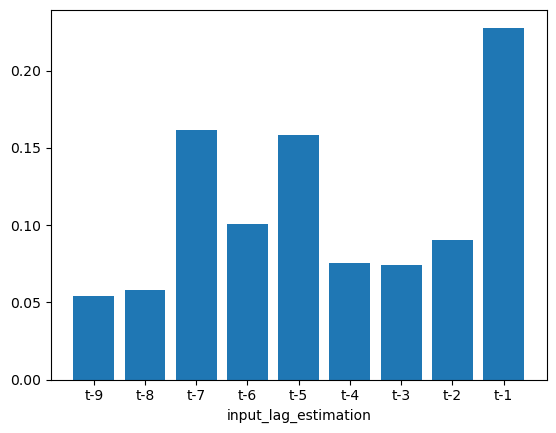

In [120]:
names = dataframe.columns.values[0:-1]
ticks = [i for i in range(len(names))]
pyplot.bar(ticks, model.feature_importances_)
pyplot.xticks(ticks, names)
pyplot.xlabel('input_lag_estimation')
pyplot.show()

In [121]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 128 entries, 2014-02-01 to 2024-09-01
Freq: MS
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   resid   128 non-null    float64
dtypes: float64(1)
memory usage: 2.0 KB


In [122]:
train_resid = df1.iloc[:115]
test_resid = df1.iloc[115:]

In [123]:
train_resid

,resid
Date,
2014-02-01,10.888337
2014-03-01,3.152305
2014-04-01,5.516596
2014-05-01,0.077082
2014-06-01,6.278486
...,...
2023-04-01,8.424376
2023-05-01,0.615278
2023-06-01,0.818972


In [124]:
test_resid

,resid
Date,
2023-09-01,5.638623
2023-10-01,1.258482
2023-11-01,0.011045
2023-12-01,1.297783
2024-01-01,2.100152
2024-02-01,0.176633
2024-03-01,0.001316
2024-04-01,0.455333
2024-05-01,0.214550


In [125]:
from sklearn.preprocessing import MinMaxScaler

In [126]:
scaler = MinMaxScaler()
scaler.fit(train_resid)

MinMaxScaler()

In [127]:
scaled_train = scaler.transform(train_resid)
scaled_test = scaler.transform(test_resid)

In [128]:
scaled_test

array([[3.34788084e-02],
       [7.47196158e-03],
       [6.53756920e-05],
       [7.70530897e-03],
       [1.24693298e-02],
       [1.04854047e-03],
       [7.60722106e-06],
       [2.70330716e-03],
       [1.27367229e-03],
       [2.60537928e-04],
       [2.00588580e-03],
       [4.71255696e-03],
       [1.76434879e-03]])

In [ ]:
pip install --upgrade keras


In [ ]:
pip install --upgrade tensorflow


In [129]:
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator

In [130]:
# Define the generator
n_input = 1 # how many data will estimate the next time stand value.
n_features = 1

train_generator = TimeseriesGenerator(scaled_train,scaled_train,length=n_input,batch_size=1)

In [131]:
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout
from keras.utils import plot_model

In [132]:
model = Sequential()

model.add(LSTM(66, activation='relu', input_shape =(n_input,n_features)))    #relu = rectified linear unit
model.add(Dense(1))
model.compile(optimizer='adam',loss='mse')

In [133]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 66)             │        17,952 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │            67 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 18,019 (70.39 KB)

 Trainable params: 18,019 (70.39 KB)

 Non-trainable params: 0 (0.00 B)

In [134]:
plot_model(model,show_shapes=True)

You must install pydot (`pip install pydot`) for `plot_model` to work.


In [135]:
model.fit(train_generator, epochs=25)

Epoch 1/25
114/114 ━━━━━━━━━━━━━━━━━━━━ 1s 912us/step - loss: 0.0086
Epoch 2/25
114/114 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0082
Epoch 3/25
114/114 ━━━━━━━━━━━━━━━━━━━━ 0s 919us/step - loss: 0.0043  
Epoch 4/25
114/114 ━━━━━━━━━━━━━━━━━━━━ 0s 907us/step - loss: 0.0188
Epoch 5/25
114/114 ━━━━━━━━━━━━━━━━━━━━ 0s 950us/step - loss: 0.0202
Epoch 6/25
114/114 ━━━━━━━━━━━━━━━━━━━━ 0s 844us/step - loss: 0.0079 
Epoch 7/25
114/114 ━━━━━━━━━━━━━━━━━━━━ 0s 833us/step - loss: 0.0026    
Epoch 8/25
114/114 ━━━━━━━━━━━━━━━━━━━━ 0s 812us/step - loss: 0.0223
Epoch 9/25
114/114 ━━━━━━━━━━━━━━━━━━━━ 0s 868us/step - loss: 0.0191   
Epoch 10/25
114/114 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0212 
Epoch 11/25
114/114 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0068
Epoch 12/25
114/114 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0032  
Epoch 13/25
114/114 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0059  
Epoch 14/25
114/114 ━━━━━━━━━━━━━━━━━━━━ 0s 867us/step - loss: 0.0068  
Epoch 15/25
114/114 ━━

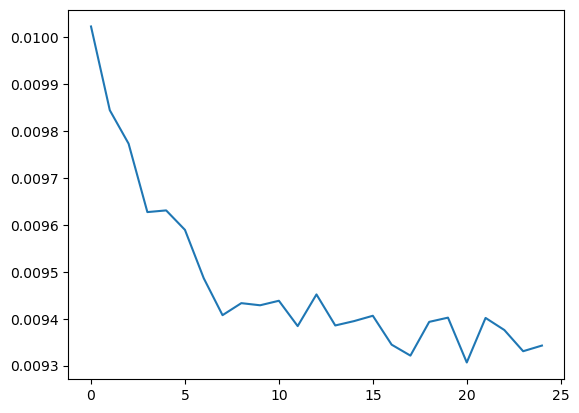

In [136]:
myloss = model.history.history['loss']

plt.plot(range(len(myloss)),myloss)

In [137]:
# Holding my prediction
test_prediction = []

# Last n_input point from the train set
first_eval_batch= scaled_train[-n_input:]

# Reshape this to the RNN format. same as TimeSeriesGenarator
current_batch = first_eval_batch.reshape((1,n_input,n_features))

# How far will we forecast?

for i in range(len(test)):
    current_pred = model.predict(current_batch)[0]
    
    test_prediction.append(current_pred)
    
    current_batch= np.append(current_batch[:,1:],[[current_pred]],axis=1)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step


In [138]:
test_prediction

[array([0.0258332], dtype=float32),
 array([0.03138062], dtype=float32),
 array([0.03260351], dtype=float32),
 array([0.03287338], dtype=float32),
 array([0.03293294], dtype=float32),
 array([0.03294609], dtype=float32),
 array([0.032949], dtype=float32),
 array([0.03294963], dtype=float32),
 array([0.03294978], dtype=float32),
 array([0.03294981], dtype=float32),
 array([0.03294982], dtype=float32),
 array([0.03294982], dtype=float32),
 array([0.03294982], dtype=float32),
 array([0.03294982], dtype=float32)]

In [139]:
true_prediction = scaler.inverse_transform(test_prediction)

In [140]:
true_prediction = true_prediction[:13]


In [141]:
test_resid['resid']

Date
2023-09-01    5.638623
2023-10-01    1.258482
2023-11-01    0.011045
2023-12-01    1.297783
2024-01-01    2.100152
2024-02-01    0.176633
2024-03-01    0.001316
2024-04-01    0.455333
2024-05-01    0.214550
2024-06-01    0.043915
2024-07-01    0.337871
2024-08-01    0.793736
2024-09-01    0.297191
Freq: MS, Name: resid, dtype: float64

In [142]:
test_resid['prediction Volatility ARIMA-LSTM(Random_Forest)'] = true_prediction

In [143]:
test_resid['Prediction Volatility ARIMA-GARCH']= rolling_predictions
test_resid['true Volatility']= resid_test
test_resid.to_csv('Gram volatility.csv')

In [144]:
test['ARIMA-LSTM_Pred']= test['ARIMA_prediction']+test_resid['prediction Volatility ARIMA-LSTM(Random_Forest)']

In [145]:
test

,Gram,Moong,Arhar,ARIMA_prediction,GARCH_prediction,ARIMA-LSTM_Pred
Date,,,,,,
2023-08-01,159.9,174.2,217.2,174.501546,175.935542,NaN
2023-09-01,168.0,177.7,231.6,175.698192,177.272165,180.049122
2023-10-01,173.3,180.4,240.3,176.798393,179.149668,182.083635
2023-11-01,176.1,182.0,245.6,177.809923,179.330150,183.301127
2023-12-01,177.6,182.4,246.4,178.739928,180.231970,184.276582
2024-01-01,177.7,182.1,241.2,179.594978,181.709447,185.141665
2024-02-01,177.0,182.4,236.7,180.381114,182.730940,185.930016
2024-03-01,177.3,183.0,233.8,181.103891,182.725781,186.653282
2024-04-01,176.9,184.2,236.2,181.768416,183.189105,187.317914


In [146]:
test2=test = test.dropna(subset=['ARIMA-LSTM_Pred'])

test2


,Gram,Moong,Arhar,ARIMA_prediction,GARCH_prediction,ARIMA-LSTM_Pred
Date,,,,,,
2023-09-01,168.0,177.7,231.6,175.698192,177.272165,180.049122
2023-10-01,173.3,180.4,240.3,176.798393,179.149668,182.083635
2023-11-01,176.1,182.0,245.6,177.809923,179.330150,183.301127
2023-12-01,177.6,182.4,246.4,178.739928,180.231970,184.276582
2024-01-01,177.7,182.1,241.2,179.594978,181.709447,185.141665
2024-02-01,177.0,182.4,236.7,180.381114,182.730940,185.930016
2024-03-01,177.3,183.0,233.8,181.103891,182.725781,186.653282
2024-04-01,176.9,184.2,236.2,181.768416,183.189105,187.317914
2024-05-01,178.5,185.3,243.6,182.379382,183.752314,187.928904


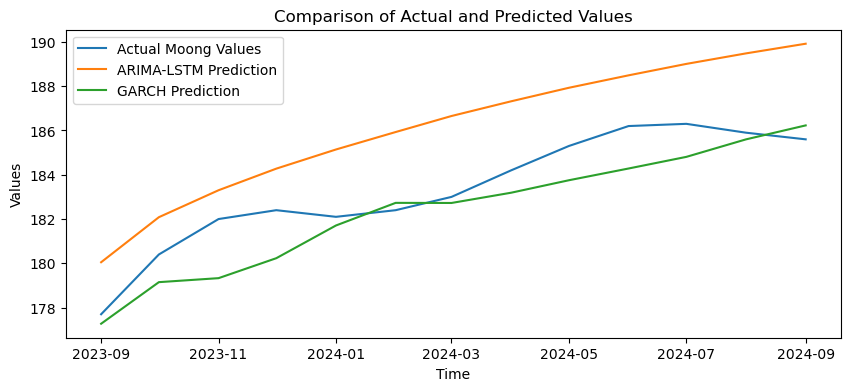

In [147]:
plt.figure(figsize=(10, 4))
plt.plot(test['Moong'], label='Actual Moong Values')
plt.plot(test['ARIMA-LSTM_Pred'], label='ARIMA-LSTM Prediction')
plt.plot(test['GARCH_prediction'], label='GARCH Prediction')

# Adding labels, title, and legend
plt.xlabel("Time")
plt.ylabel("Values")
plt.title("Comparison of Actual and Predicted Values")
plt.legend()
plt.show()

In [148]:
rmse(test['Moong'],test['ARIMA-LSTM_Pred'])

2.8997862365368614

In [149]:
import numpy as np

def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

In [150]:
mean_absolute_percentage_error(test['Moong'],test['ARIMA-LSTM_Pred'])

1.5114761869039732

In [151]:
test.to_csv('Gram_result with ARIMA-LSTM Random forecst.csv')